In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression



In [2]:
data_fraud = pd.read_csv('Fraudulent_Transaction.csv')

In [3]:
data_fraud

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472947,c8604004-2f4c-42ce-a1c4-cd2bebca79bb,f8a534ad-0458-465e-a85b-3ad2cdf391bc,208.48,2024-01-12 23:39:55,PayPal,health & beauty,2,29,North Laurafort,desktop,27.245.104.92,USNV Griffin\nFPO AA 52700,USNV Griffin\nFPO AA 52700,0,149,23
1472948,fff0df19-fd4a-42a5-bc42-64bb7b02edb0,f2ef2239-d9b9-40d0-9993-4b8f305d5a7b,231.57,2024-03-27 04:31:45,credit card,clothing,2,32,Burnsville,tablet,203.54.50.163,"478 John Square Apt. 235\nMillerhaven, GA 68797","478 John Square Apt. 235\nMillerhaven, GA 68797",0,132,4
1472949,9e79012f-e00b-47d1-8700-0c302db20d3e,fa5b9a25-9606-478a-8abe-ef20bbb3980f,101.80,2024-01-31 23:51:42,bank transfer,electronics,4,36,Garciafort,mobile,51.241.30.149,"351 Frazier Radial Apt. 989\nPort Charles, OH ...","182 House Island Suite 198\nEast Scott, FM 84301",0,98,23
1472950,917066b1-4dfb-4472-b3f0-292663c45d21,04524272-e14f-460b-bc70-5316bd28463d,61.80,2024-01-12 16:21:32,bank transfer,electronics,5,34,Lake Josephberg,desktop,210.67.203.4,"27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...","27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...",0,191,16


In [4]:
data_fraud.describe(include='all')

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
count,1472952,1472952,1.472952e+06,1472952,1472952,1472952,1.472952e+06,1.472952e+06,1472952,1472952,1472952,1472952,1472952,1.472952e+06,1.472952e+06,1.472952e+06
unique,1472952,1472952,NaN,1346684,4,5,NaN,NaN,99135,3,1472651,1472948,1472949,NaN,NaN,NaN
top,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,NaN,2024-01-27 04:00:16,credit card,health & beauty,NaN,NaN,New Michael,mobile,170.118.178.249,USS Sanchez\nFPO AE 14652,USCGC Holmes\nFPO AA 56289,NaN,NaN,NaN
freq,1,1,NaN,6,368429,295367,NaN,NaN,1258,491743,2,2,2,NaN,NaN,NaN
mean,NaN,NaN,2.267683e+02,NaN,NaN,NaN,3.000230e+00,3.451208e+01,NaN,NaN,NaN,NaN,NaN,5.012926e-02,1.796464e+02,1.128696e+01
std,NaN,NaN,2.703951e+02,NaN,NaN,NaN,1.414736e+00,1.000313e+01,NaN,NaN,NaN,NaN,NaN,2.182117e-01,1.068642e+02,6.975995e+00
min,NaN,NaN,1.000000e+01,NaN,NaN,NaN,1.000000e+00,-1.600000e+01,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00,0.000000e+00
25%,NaN,NaN,6.861000e+01,NaN,NaN,NaN,2.000000e+00,2.800000e+01,NaN,NaN,NaN,NaN,NaN,0.000000e+00,8.600000e+01,5.000000e+00
50%,NaN,NaN,1.517600e+02,NaN,NaN,NaN,3.000000e+00,3.500000e+01,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.790000e+02,1.100000e+01
75%,NaN,NaN,2.960500e+02,NaN,NaN,NaN,4.000000e+00,4.100000e+01,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.720000e+02,1.700000e+01


In [5]:
data_fraud.select_dtypes(include ='number')

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
0,58.09,1,17,0,30,5
1,389.96,2,40,0,72,8
2,134.19,2,22,0,63,3
3,226.17,5,31,0,124,20
4,121.53,2,51,0,158,5
...,...,...,...,...,...,...
1472947,208.48,2,29,0,149,23
1472948,231.57,2,32,0,132,4
1472949,101.80,4,36,0,98,23
1472950,61.80,5,34,0,191,16


In [6]:
data_fraud.select_dtypes(include ='object').nunique()

Transaction ID       1472952
Customer ID          1472952
Transaction Date     1346684
Payment Method             4
Product Category           5
Customer Location      99135
Device Used                3
IP Address           1472651
Shipping Address     1472948
Billing Address      1472949
dtype: int64

In [7]:
data_fraud_cat =  data_fraud.select_dtypes(include ='object').columns

In [8]:
data_fraud_cat.drop('Transaction ID')

Index(['Customer ID', 'Transaction Date', 'Payment Method', 'Product Category',
       'Customer Location', 'Device Used', 'IP Address', 'Shipping Address',
       'Billing Address'],
      dtype='object')

In [9]:
data_fraud_cat.nunique()

10

In [10]:
data_fraud['IP Address'].unique()

array(['212.195.49.198', '208.106.249.121', '76.63.88.212', ...,
       '51.241.30.149', '210.67.203.4', '107.116.208.218'], dtype=object)

In [11]:
for col in data_fraud_cat:
   if(data_fraud[col].nunique() >5):
        data_fraud.drop(col,axis=1,inplace=True)

In [12]:
data_fraud

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,58.09,bank transfer,electronics,1,17,tablet,0,30,5
1,389.96,debit card,electronics,2,40,desktop,0,72,8
2,134.19,PayPal,home & garden,2,22,tablet,0,63,3
3,226.17,bank transfer,clothing,5,31,desktop,0,124,20
4,121.53,bank transfer,clothing,2,51,tablet,0,158,5
...,...,...,...,...,...,...,...,...,...
1472947,208.48,PayPal,health & beauty,2,29,desktop,0,149,23
1472948,231.57,credit card,clothing,2,32,tablet,0,132,4
1472949,101.80,bank transfer,electronics,4,36,mobile,0,98,23
1472950,61.80,bank transfer,electronics,5,34,desktop,0,191,16


In [13]:
data_fraud['hours']  = pd.cut(data_fraud['Transaction Hour'], bins=4, labels = ['EarlyMorning','Morning' , 'Day', 'Night'])
data_fraud['age'] = pd.cut(data_fraud ['Customer Age'], bins=3, labels = ['Child', 'Young','Old'])

In [14]:
data_fraud.shape

(1472952, 11)

In [15]:
data_fraud.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06
mean,2.267683e+02,3.000230e+00,3.451208e+01,5.012926e-02,1.796464e+02,1.128696e+01
std,2.703951e+02,1.414736e+00,1.000313e+01,2.182117e-01,1.068642e+02,6.975995e+00
min,1.000000e+01,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.861000e+01,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00
50%,1.517600e+02,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01
75%,2.960500e+02,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01
max,1.270175e+04,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01


In [16]:
data_fraud['Is Fraudulent'].unique()

array([0, 1], dtype=int64)

In [17]:
data_fraud.groupby('Device Used').agg({'Is Fraudulent':['count']})

,Is Fraudulent
,count
Device Used,
desktop,490271
mobile,491743
tablet,490938


In [18]:
data_fraud.loc[data_fraud['Is Fraudulent'] == 1,['Is Fraudulent','Device Used']]

,Is Fraudulent,Device Used
32,1,tablet
68,1,mobile
85,1,desktop
92,1,tablet
191,1,mobile
...,...,...
1472838,1,tablet
1472901,1,desktop
1472914,1,tablet
1472917,1,tablet


In [19]:
df_2 = data_fraud.loc[data_fraud['Is Fraudulent'] == 1,['Is Fraudulent','Device Used']]

In [20]:
df_2.groupby('Device Used').agg({'Is Fraudulent':['count']})

,Is Fraudulent
,count
Device Used,
desktop,24447
mobile,24867
tablet,24524


In [21]:
data_fraud.groupby('Is Fraudulent').agg({'Customer Age':['mean','max']})

Customer Age    
                      mean max
Is Fraudulent                 
0                34.514676  86
1                34.462905  79

In [22]:
data_fraud.groupby('Is Fraudulent').agg({'Account Age Days':['mean','max']})

Account Age Days     
                          mean  max
Is Fraudulent                      
0                   182.989756  365
1                   116.295024  365

In [23]:
df_3 = data_fraud.loc[data_fraud['Is Fraudulent'] == 1,['Is Fraudulent','Customer Age']]

In [24]:
df_3.groupby('Is Fraudulent').agg({'Customer Age':['count','mean'],})

Customer Age           
                     count       mean
Is Fraudulent                        
1                    73838  34.462905

In [25]:
#target and features 

target = data_fraud['Is Fraudulent']
features = data_fraud.drop('Is Fraudulent', axis = 1)

In [26]:
target.shape

(1472952,)

In [27]:
features.shape

(1472952, 10)

In [28]:
label = LabelEncoder()

In [29]:
#Divided of dataframe in two part (train part and test part)
Xtrain, Xtest , Ytrain , Ytest = train_test_split (features,target, test_size=0.2 , random_state = 0, stratify= target)

In [30]:
cat_columns = data_fraud.select_dtypes(include = object).columns

In [31]:
for col in cat_columns :
    Xtrain[col] = label.fit_transform(Xtrain[col])
    Xtest[col]  = label.transform(Xtest[col])

In [32]:
num_columns = Xtrain.select_dtypes(include = 'number').columns

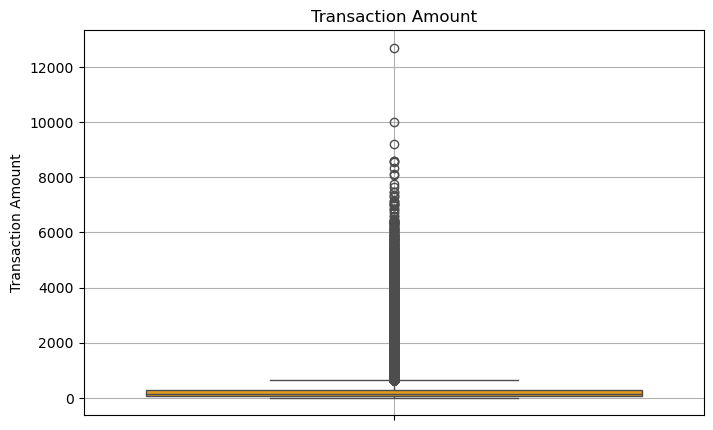

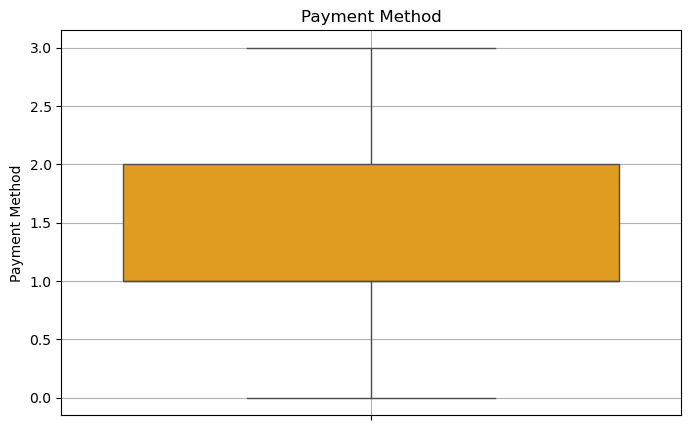

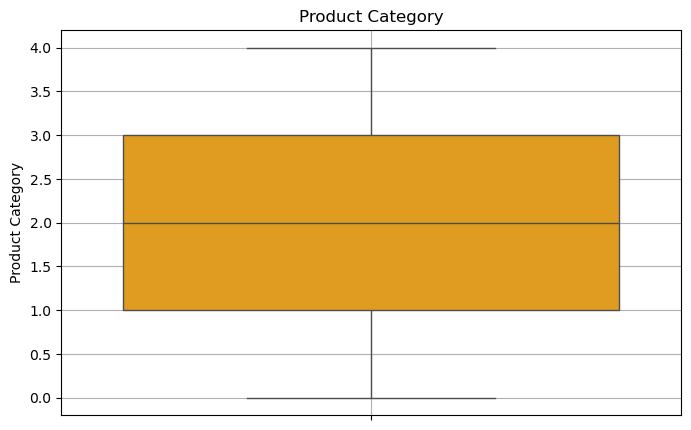

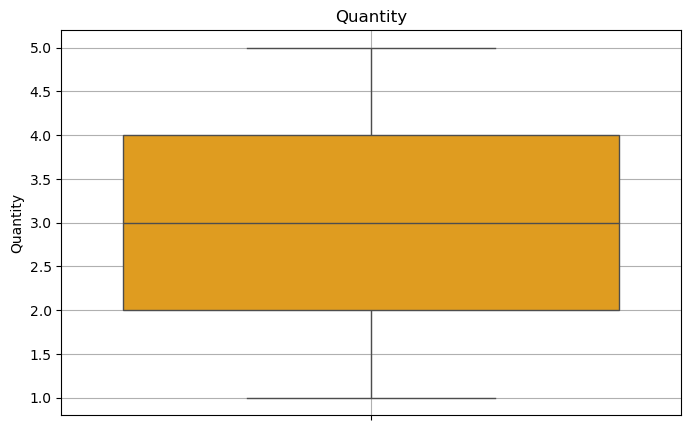

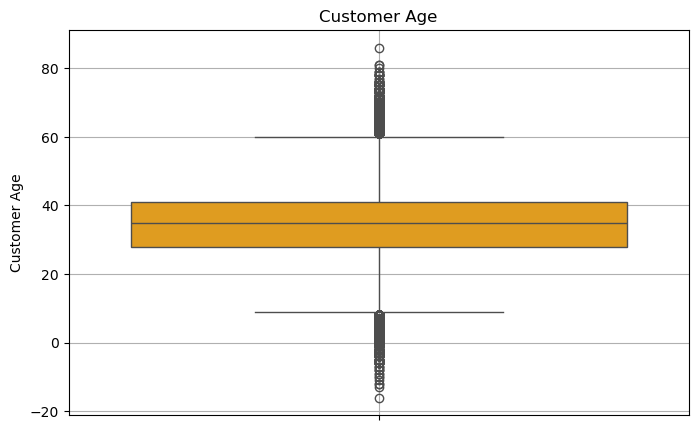

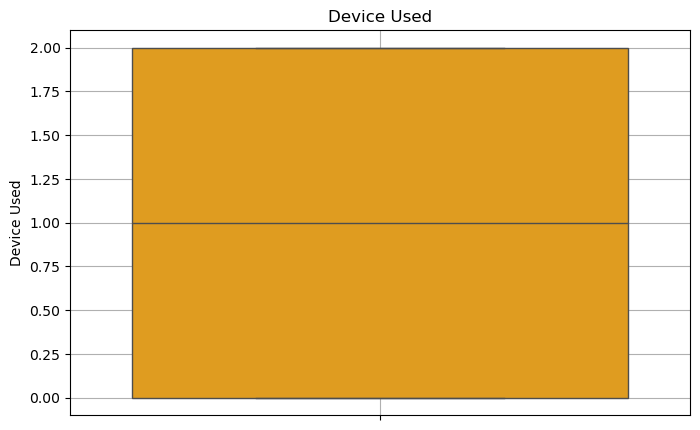

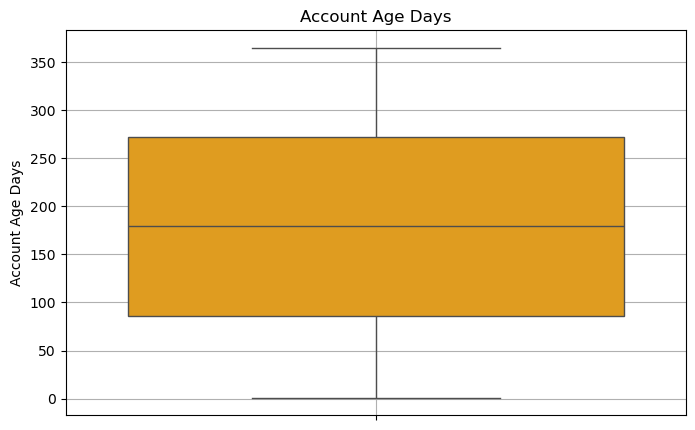

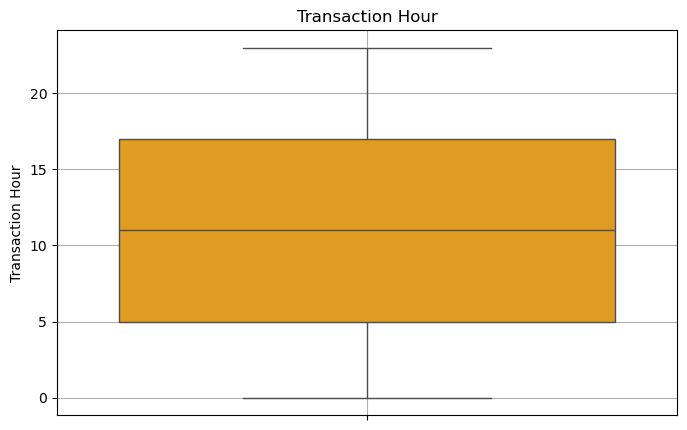

In [37]:
for col in num_columns :
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=Xtrain[col], color="orange")
    plt.title(col)
    plt.ylabel(col)
    plt.grid(True)
    plt.show()